## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('data/adult_preprocessed.csv',index_col=0)

In [3]:
dataframe.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check for null values and get a summary of all the columns in the dataset

In [4]:
# Check for null values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1032 non-null   int64 
 1   Workclass       1032 non-null   object
 2   fnlwgt          1032 non-null   int64 
 3   education       1032 non-null   object
 4   education-num   1032 non-null   int64 
 5   marital-status  1032 non-null   object
 6   occupation      1032 non-null   object
 7   relationship    1032 non-null   object
 8   race            1032 non-null   object
 9   sex             1032 non-null   object
 10  capital-gain    1032 non-null   int64 
 11  capital-loss    1032 non-null   int64 
 12  hours-per-week  1032 non-null   int64 
 13  native-country  1032 non-null   object
 14  Income          1032 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [5]:
# Get a summary of the columns in the dataset
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


It can be seen that there are no null values in any of the columns. So it is a pretty clean dataset.<br/>
The minimum, 25th percentile, median, 75th percentile values for the columns `capital-gain` and `capital-loss` are 0.

### For further analysis split to bring all the continuous variables together and categorical variables together.

In [6]:
# Seperate continuous variables and categorical variables
dataframe_con = dataframe.select_dtypes(include=np.number)
dataframe_cat = dataframe.select_dtypes(exclude=np.number)

###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

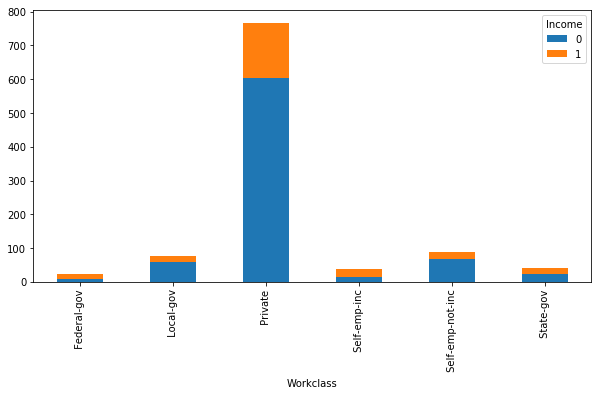

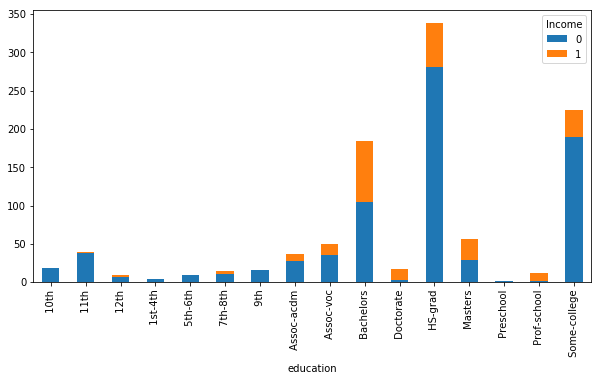

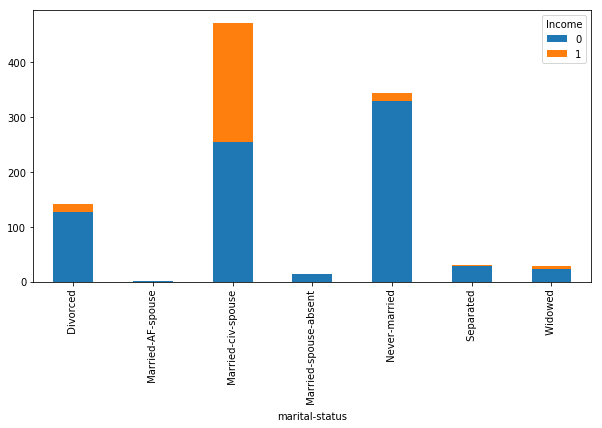

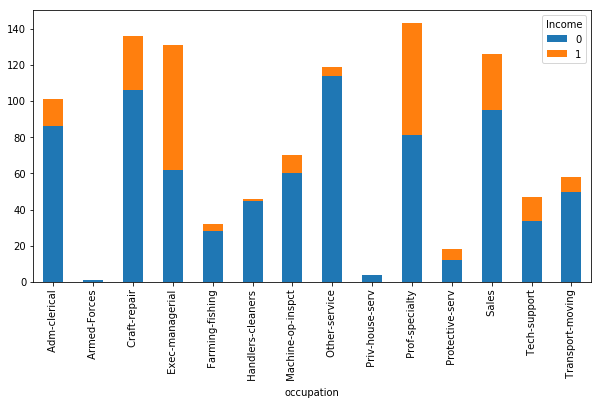

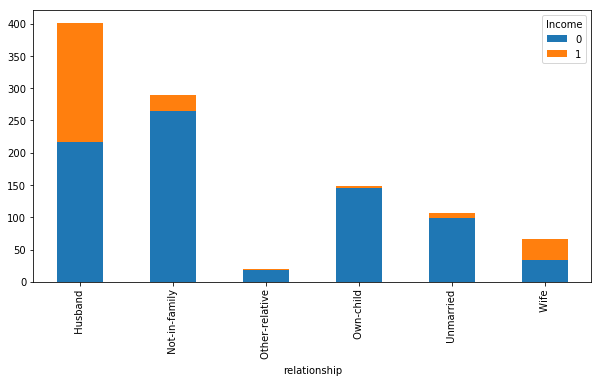

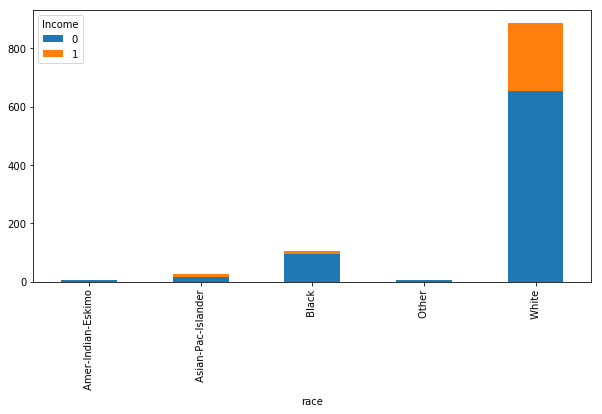

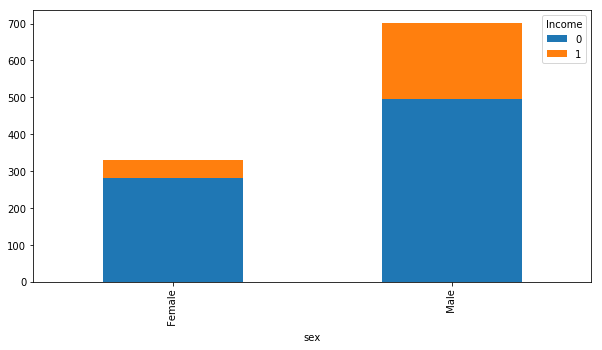

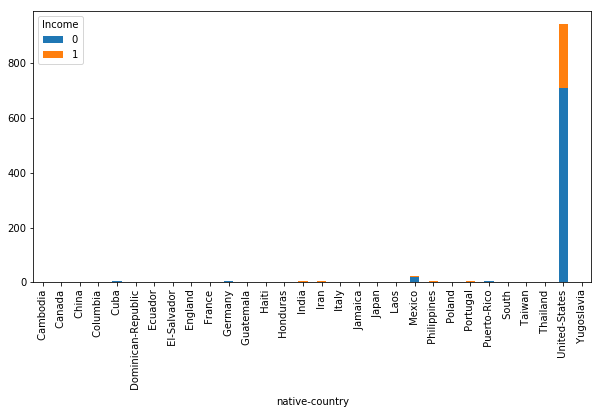

In [8]:
for i in dataframe_cat:
    dataframe.groupby(i)['Income'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))



### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

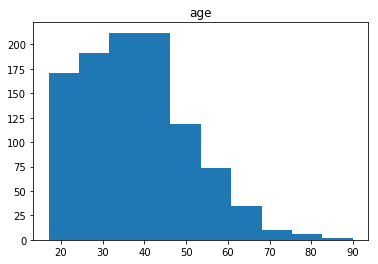

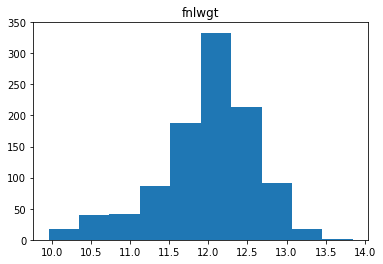

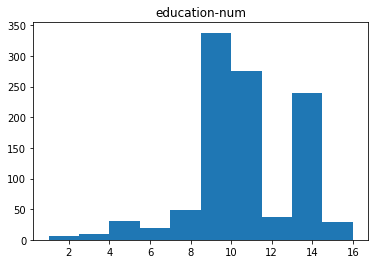

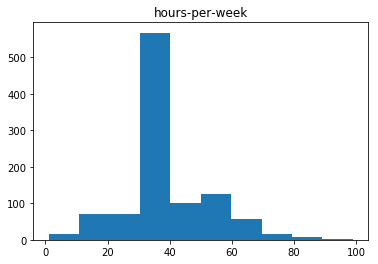

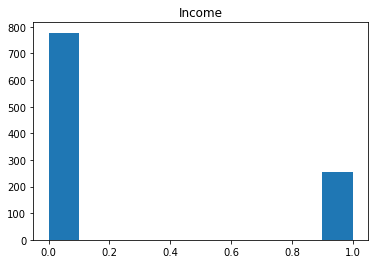

In [14]:
for i in dataframe_con:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [16]:
dataframe_con.drop(['capital-gain','capital-loss'],1,inplace=True)

### Check for skewness in the continuous data

In [17]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,age,0.616053
1,fnlwgt,-0.775995
2,education-num,-0.302202
3,hours-per-week,0.163186
4,Income,1.178758


### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

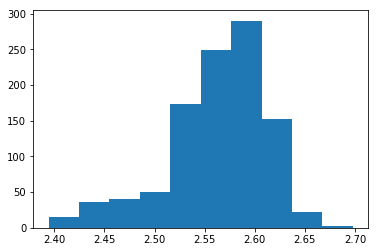

In [18]:
dataframe_con['fnlwgt'] = np.log1p(dataframe_con['fnlwgt'])

plt.hist(dataframe_con['fnlwgt']);

### Check for the pearson correlation between the continuous variables by plotting a heatmap

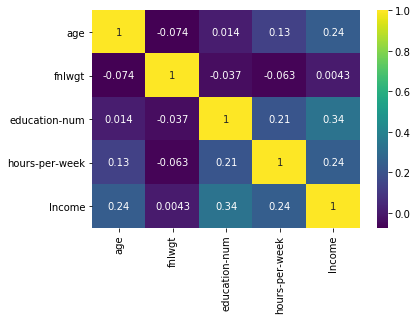

In [22]:
# Check for correlation between continuous variables
sns.heatmap(dataframe_con.corr(),cmap='viridis',annot=True)

### Label Encode all the categorical variables

In [23]:
# Label Encode Categorical variables

le = LabelEncoder()
for col in dataframe_cat:
    dataframe_cat[col] = le.fit_transform(dataframe_cat[col])
     

dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


### Concatenate both the continuous and categorical dataframes

In [24]:
new_dataframe = pd.concat([dataframe_con,dataframe_cat],axis=1,ignore_index=True)

new_dataframe.columns = ['age','fnlwgt','education-num','hours-per-week','Income','Workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [25]:
new_dataframe.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,2.506199,13,40,0,5,9,4,0,1,4,1,28
1,50,2.512064,13,13,0,4,9,2,3,0,4,1,28
2,38,2.586364,9,40,0,2,11,0,5,1,4,1,28
3,53,2.592726,7,40,0,2,1,2,5,0,2,1,28
4,28,2.619730,13,40,0,2,9,2,9,5,2,0,4


In [26]:
columns = list(new_dataframe)
columns[4],columns[-1] = 'native-country','Income'

In [27]:
new_dataframe = new_dataframe[columns]

In [28]:
new_dataframe.head()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex,Income
0,39,2.506199,13,40,28,5,9,4,0,1,4,1,0
1,50,2.512064,13,13,28,4,9,2,3,0,4,1,0
2,38,2.586364,9,40,28,2,11,0,5,1,4,1,0
3,53,2.592726,7,40,28,2,1,2,5,0,2,1,0
4,28,2.619730,13,40,4,2,9,2,9,5,2,0,0


### Split into features and target

In [29]:
X = new_dataframe.iloc[:,:-1]
y = new_dataframe.iloc[:,-1]

### Fit a StandardScaler on the features

In [30]:
# Fitting a Standard Scaler 

ss = StandardScaler()
X = ss.fit_transform(X)

### Convert array to a dataframe

In [31]:
X = pd.DataFrame(X,columns=columns[:-1])

In [32]:
X.head()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex
0,0.081561,-1.156398,1.111052,-0.060217,0.260938,3.026993,-0.379789,0.935132,-1.570166,-0.294678,0.390011,0.687155
1,0.939653,-1.037652,1.111052,-2.361827,0.260938,1.941567,-0.379789,-0.402437,-0.819975,-0.902893,0.390011,0.687155
2,0.003553,0.466895,-0.488677,-0.060217,0.260938,-0.229286,0.167999,-1.740006,-0.319849,-0.294678,0.390011,0.687155
3,1.173678,0.595712,-1.288541,-0.060217,0.260938,-0.229286,-2.570939,-0.402437,-0.319849,-0.902893,-2.079263,0.687155
4,-0.776531,1.142525,1.111052,-0.060217,-5.619778,-0.229286,-0.379789,-0.402437,0.680405,2.138182,-2.079263,-1.455275


### Split into train and validation data

In [33]:
 

X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.2)

### Fit a logistic regression model

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_valid)

### Checking the accuracy, f1_score, confusion matrix

In [35]:
print('Accuracy is {}'.format(accuracy_score(y_valid,y_pred)))
print('F1-score is {}'.format(f1_score(y_valid,y_pred)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred)))

Accuracy is 0.8164251207729468
F1-score is 0.45714285714285713
Confusion Matrix is

[[153  11]
 [ 27  16]]


### Perform hyperparameter tuning using GridSearch

In [36]:
params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=logreg, param_grid=params,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
y_pred_grid_search = grid_search.predict(X_valid)

### Find the best parameters and the metrics after grid search

In [37]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

In [38]:
print('Accuracy after grid search is {}'.format(accuracy_score(y_valid,y_pred_grid_search)))
print('F1-score after grid search is {}'.format(f1_score(y_valid,y_pred_grid_search)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred_grid_search)))

Accuracy after grid search is 0.8164251207729468
F1-score after grid search is 0.45714285714285713
Confusion Matrix is

[[153  11]
 [ 27  16]]


### Applying Deep Learning

In [39]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation


Using TensorFlow backend.


In [40]:
model = Sequential()
model.add(Dense(10,input_shape = (X_train.shape[1],),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,batch_size=100,epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
825/825 [==============================] - 2s 3ms/step - loss: 0.6249
Epoch 2/20
825/825 [==============================] - 0s 157us/step - loss: 0.

In [43]:
y_pred = model.predict(X_valid)

In [44]:
y_pred

array([[0.44717324],
       [0.45503855],
       [0.01714185],
       [0.3414689 ],
       [0.01922241],
       [0.02830213],
       [0.39892963],
       [0.11218226],
       [0.3869773 ],
       [0.292172  ],
       [0.37097794],
       [0.3470859 ],
       [0.00751519],
       [0.09901926],
       [0.39415187],
       [0.10377771],
       [0.10917896],
       [0.112638  ],
       [0.16155267],
       [0.3259049 ],
       [0.0407407 ],
       [0.01555437],
       [0.41596743],
       [0.02964258],
       [0.28151008],
       [0.4139548 ],
       [0.22492635],
       [0.16011652],
       [0.01939002],
       [0.37042627],
       [0.00860107],
       [0.31112933],
       [0.06271926],
       [0.11143175],
       [0.03318989],
       [0.01825389],
       [0.42888844],
       [0.11671695],
       [0.38286474],
       [0.43251523],
       [0.25206903],
       [0.1679087 ],
       [0.39918312],
       [0.3279946 ],
       [0.21282816],
       [0.22672087],
       [0.3904351 ],
       [0.460

In [45]:
y_pred = np.where(y_pred>0.5,1,0)

In [46]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [47]:
print("accuracy",accuracy_score(y_valid,y_pred))

accuracy 0.7922705314009661
